# Prediksi Tingkat Stres Mahasiswa dengan Machine Learning

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Import 5 model klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import metrik evaluasi
from sklearn.metrics import classification_report, accuracy_score


## Langkah 1: Eksplorasi dan Analisis Data (EDA)

Pertama, kita akan memuat dataset `student_lifestyle_dataset.csv` dan melihat isinya untuk memahami struktur dan karakteristik data.

In [2]:
# Memuat dataset
file_path = 'student_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Menampilkan 5 baris pertama
print("Tampilan Awal Dataset:")
display(df.head())

Tampilan Awal Dataset:


,student_id,name,gpa,weekly_study_hours,sleep_hours_per_night,social_events_per_week,exercise_hours_per_week,part_time_job_hours,commute_time_minutes,financial_stress_level,assignments_due_this_week,classes_per_week,extracurricular_hours
0,STU_0001,Mary Trevino,3.45,23.9,7.3,3.6,0.1,0,30,2.0,2,23,0.4
1,STU_0002,Hunter Weaver,3.32,10.0,4.4,2.9,0.7,0,37,1.4,5,20,6.7
2,STU_0003,Madison Reid,2.90,32.6,6.8,0.6,3.3,11,7,1.5,2,24,7.0
3,STU_0004,Mark Stout,3.31,32.1,5.3,0.0,4.9,0,4,2.8,0,20,3.0
4,STU_0005,Joseph Smith,3.49,32.1,7.6,2.0,0.2,0,10,2.2,3,14,1.3


In [4]:
# Menampilkan informasi ringkas tentang dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 300 non-null    object 
 1   name                       300 non-null    object 
 2   gpa                        300 non-null    float64
 3   weekly_study_hours         300 non-null    float64
 4   sleep_hours_per_night      300 non-null    float64
 5   social_events_per_week     300 non-null    float64
 6   exercise_hours_per_week    300 non-null    float64
 7   part_time_job_hours        300 non-null    int64  
 8   commute_time_minutes       300 non-null    int64  
 9   financial_stress_level     300 non-null    float64
 10  assignments_due_this_week  300 non-null    int64  
 11  classes_per_week           300 non-null    int64  
 12  extracurricular_hours      300 non-null    float64
dtypes: float64(7), int64(4), objec

In [5]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,gpa,weekly_study_hours,sleep_hours_per_night,social_events_per_week,exercise_hours_per_week,part_time_job_hours,commute_time_minutes,financial_stress_level,assignments_due_this_week,classes_per_week,extracurricular_hours
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.168633,25.533000,6.495667,1.944333,2.931333,4.633333,22.333333,2.148333,2.453333,18.266667,2.115333
std,0.461941,7.644655,1.235788,1.158624,2.854853,7.809108,21.865251,0.665914,1.528269,3.780192,2.091510
min,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000
25%,2.817500,20.475000,5.675000,1.200000,0.800000,0.000000,6.000000,1.600000,1.000000,15.000000,0.700000
50%,3.200000,25.700000,6.500000,1.900000,2.000000,0.000000,15.000000,2.000000,2.000000,18.000000,1.500000
75%,3.510000,30.500000,7.400000,2.800000,4.200000,11.250000,31.000000,2.600000,3.000000,22.000000,2.925000
max,4.000000,50.000000,9.600000,5.200000,16.800000,24.000000,123.000000,3.800000,7.000000,24.000000,16.300000


In [6]:
# Memeriksa nilai yang hilang (missing values)
print("\nPemeriksaan Nilai Hilang:")
print(df.isnull().sum())


Pemeriksaan Nilai Hilang:
student_id                   0
name                         0
gpa                          0
weekly_study_hours           0
sleep_hours_per_night        0
social_events_per_week       0
exercise_hours_per_week      0
part_time_job_hours          0
commute_time_minutes         0
financial_stress_level       0
assignments_due_this_week    0
classes_per_week             0
extracurricular_hours        0
dtype: int64


## Langkah 2: Pra-pemrosesan Data (Data Preprocessing)

Dataset ini tidak memiliki kolom `stress_level`. Oleh karena itu, kita akan membuatnya (**Feature Engineering**). Kita akan membuat kategori stres (0: Rendah, 1: Sedang, 2: Tinggi) berdasarkan aturan dari fitur lain seperti jam belajar, jam tidur, dan beban tugas.

Setelah itu, kita akan memisahkan data fitur (X) dan target (y), lalu membaginya menjadi data latih dan data uji.

In [7]:
# === Feature Engineering: Membuat kolom 'stress_level' ===
# Aturan ini bisa disesuaikan sesuai dengan hipotesis Anda.

conditions = [
    # Kondisi untuk stres TINGGI (2)
    (df['weekly_study_hours'] > 30) | (df['sleep_hours_per_night'] < 6) | (df['assignments_due_this_week'] >= 4),
    # Kondisi untuk stres SEDANG (1)
    (df['weekly_study_hours'] > 20) | (df['sleep_hours_per_night'] < 7) | (df['financial_stress_level'] >= 3),
]

# Tentukan nilai untuk setiap kondisi. Jumlahnya harus sama dengan jumlah kondisi di atas.
# Nilai 0 untuk stres RENDAH akan ditangani oleh parameter 'default=0'.
stress_values = [2, 1]  # <--- INI BAGIAN YANG DIPERBAIKI

# Buat kolom 'stress_level' menggunakan np.select
# Jika tidak ada kondisi yang terpenuhi, nilainya akan menjadi 0 (default).
df['stress_level'] = np.select(conditions, stress_values, default=0)

print("Kolom 'stress_level' berhasil dibuat.")
print("Distribusi tingkat stres yang dihasilkan:")
print(df['stress_level'].value_counts())

Kolom 'stress_level' berhasil dibuat.
Distribusi tingkat stres yang dihasilkan:
stress_level
2    185
1    103
0     12
Name: count, dtype: int64


In [8]:
# === Memisahkan Fitur dan Target ===
# Kita tidak akan menggunakan 'student_id' dan 'name' untuk prediksi
X = df.drop(['student_id', 'name', 'stress_level'], axis=1)
y = df['stress_level']

In [9]:
# === Membagi Data Latih dan Data Uji ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"\nBentuk data latih (X_train): {X_train.shape}")
print(f"Bentuk data uji (X_test): {X_test.shape}")


Bentuk data latih (X_train): (225, 11)
Bentuk data uji (X_test): (75, 11)


## Langkah 3: Pemodelan (Modeling)

Sekarang, kita akan melatih lima model klasifikasi yang berbeda. Setiap model akan dimasukkan ke dalam *pipeline* yang juga mencakup penskalaan data (`StandardScaler`) untuk memastikan semua fitur memiliki skala yang sama, sehingga performa model menjadi lebih baik.

In [10]:
# Inisialisasi lima model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [11]:
# Dictionary untuk menyimpan hasil
results = {}

# Melatih setiap model
for name, model in models.items():
    # Membuat pipeline untuk setiap model
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Melatih model dengan data latih
    pipeline.fit(X_train, y_train)
    
    # Menyimpan model yang sudah dilatih
    results[name] = pipeline
    print(f" Model '{name}' berhasil dilatih.")

 Model 'Logistic Regression' berhasil dilatih.
 Model 'K-Nearest Neighbors' berhasil dilatih.
 Model 'Support Vector Machine' berhasil dilatih.
 Model 'Decision Tree' berhasil dilatih.
 Model 'Random Forest' berhasil dilatih.


## Langkah 4: Evaluasi Model (Evaluation)

Setelah semua model dilatih, kita akan mengevaluasi kinerjanya menggunakan data uji yang belum pernah dilihat sebelumnya. Kita akan membandingkan akurasi dari kelima model tersebut untuk menentukan mana yang terbaik untuk dataset ini.

--- Laporan Klasifikasi untuk Logistic Regression ---
Akurasi: 0.7067
              precision    recall  f1-score   support

      Rendah       0.50      0.33      0.40         3
      Sedang       0.61      0.54      0.57        26
      Tinggi       0.76      0.83      0.79        46

    accuracy                           0.71        75
   macro avg       0.62      0.57      0.59        75
weighted avg       0.70      0.71      0.70        75

-----------------------------------------------------------
--- Laporan Klasifikasi untuk K-Nearest Neighbors ---
Akurasi: 0.7200
              precision    recall  f1-score   support

      Rendah       0.00      0.00      0.00         3
      Sedang       0.62      0.69      0.65        26
      Tinggi       0.86      0.78      0.82        46

    accuracy                           0.72        75
   macro avg       0.49      0.49      0.49        75
weighted avg       0.74      0.72      0.73        75

--------------------------------------

c:\Users\ShirO KurO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ShirO KurO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ShirO KurO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ShirO KurO\anaco

,Model,Accuracy
3,Decision Tree,0.986667
4,Random Forest,0.960000
2,Support Vector Machine,0.773333
1,K-Nearest Neighbors,0.720000
0,Logistic Regression,0.706667


C:\Users\ShirO KurO\AppData\Local\Temp\ipykernel_31916\720159684.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


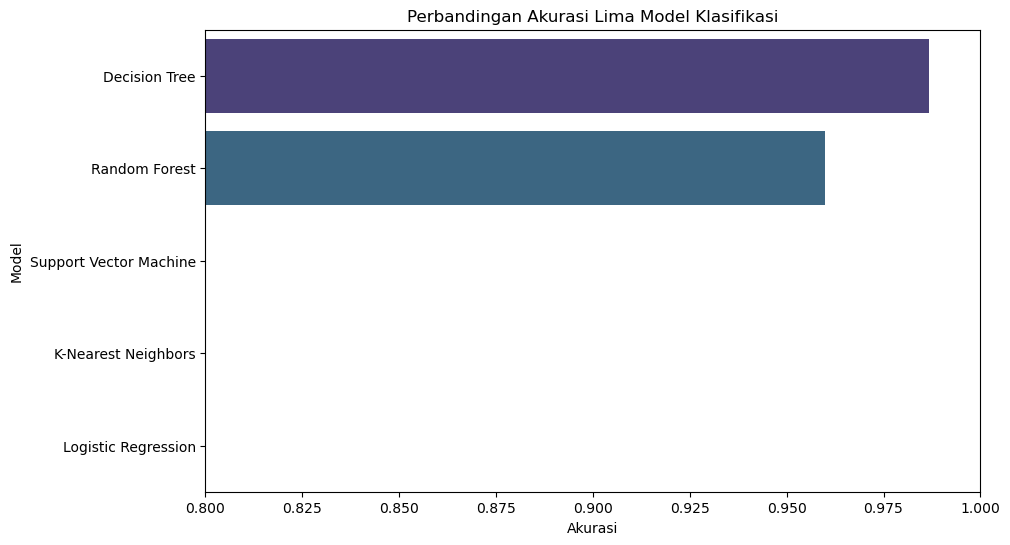

In [12]:
# Dictionary untuk menyimpan skor akurasi
accuracy_scores = {}

# Evaluasi setiap model
for name, model in results.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    print(f"--- Laporan Klasifikasi untuk {name} ---")
    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Rendah', 'Sedang', 'Tinggi']))
    print("-"*(40+len(name)))

# Menampilkan perbandingan akurasi
print("\n=== Perbandingan Akurasi Model ===")
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)
display(accuracy_df)

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Perbandingan Akurasi Lima Model Klasifikasi')
plt.xlabel('Akurasi')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)
plt.show()

## Menambahkan Prediksi ke File CSV

Sebagai langkah terakhir, kita akan menggunakan model terbaik (Random Forest, berdasarkan hasil di atas) untuk memprediksi seluruh dataset dan menyimpan hasilnya ke dalam file CSV baru.

In [13]:
# Pilih model terbaik dari hasil evaluasi
best_model_name = accuracy_df.iloc[0]['Model']
best_model = results[best_model_name]

print(f"Model terbaik adalah: {best_model_name}")

# Gunakan model terbaik untuk memprediksi seluruh dataset
all_predictions = best_model.predict(X)

# Tambahkan kolom prediksi ke DataFrame asli
df['predicted_stress_level'] = all_predictions

# Ubah label angka menjadi teks agar lebih mudah dibaca
stress_map = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}
df['predicted_stress_label'] = df['predicted_stress_level'].map(stress_map)

# Tampilkan beberapa baris hasil dengan kolom prediksi baru
print("\nDataFrame dengan kolom prediksi:")
display(df.head())

# Simpan hasilnya ke file CSV baru
output_filename = 'student_lifestyle_with_stress_prediction.csv'
df.to_csv(output_filename, index=False)

print(f"\n Hasil prediksi berhasil disimpan ke file '{output_filename}'")

Model terbaik adalah: Decision Tree

DataFrame dengan kolom prediksi:


,student_id,name,gpa,weekly_study_hours,sleep_hours_per_night,social_events_per_week,exercise_hours_per_week,part_time_job_hours,commute_time_minutes,financial_stress_level,assignments_due_this_week,classes_per_week,extracurricular_hours,stress_level,predicted_stress_level,predicted_stress_label
0,STU_0001,Mary Trevino,3.45,23.9,7.3,3.6,0.1,0,30,2.0,2,23,0.4,1,1,Sedang
1,STU_0002,Hunter Weaver,3.32,10.0,4.4,2.9,0.7,0,37,1.4,5,20,6.7,2,2,Tinggi
2,STU_0003,Madison Reid,2.90,32.6,6.8,0.6,3.3,11,7,1.5,2,24,7.0,2,2,Tinggi
3,STU_0004,Mark Stout,3.31,32.1,5.3,0.0,4.9,0,4,2.8,0,20,3.0,2,2,Tinggi
4,STU_0005,Joseph Smith,3.49,32.1,7.6,2.0,0.2,0,10,2.2,3,14,1.3,2,2,Tinggi



 Hasil prediksi berhasil disimpan ke file 'student_lifestyle_with_stress_prediction.csv'
